##### Copyright 2018 The TensorFlow Authors.

Classificando Imagens the roupas

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


## Importar o conjunto de dados Fashion MNIST

Este guia usa [Fashion MNIST] (https://github.com/zalandoresearch/fashion-mnist) conjunto de dados que contém 70.000 imagens em tons de cinza em 10 categorias. As imagens mostram peças individuais de roupa em baixa resolução (28 por 28 pixels), como pode ser visto aqui:

<table>
  <tr> <td>
    <img src = "https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt = "Fashion MNIST sprite" width = "600">
  </td> </tr>
  <tr> <td align = "center">
    <b> Figura 1. </b> <a href="https://github.com/zalandoresearch/fashion-mnist"> Amostras do Fashion-MNIST </a> (por Zalando, licença do MIT). <br/> & nbsp;
  </td> </tr>
</table>

O Fashion MNIST pretende ser uma substituição imediata para o conjunto de dados clássico [MNIST] (http://yann.lecun.com/exdb/mnist/) - frequentemente usado como o "Hello, World" de programas de aprendizado de máquina para visão computacional . O conjunto de dados MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao das peças de roupa que você usará aqui.

Este guia usa o Fashion MNIST para variar e porque é um problema um pouco mais desafiador do que o MNIST normal. Ambos os conjuntos de dados são relativamente pequenos e são usados ​​para verificar se um algoritmo funciona conforme o esperado. Eles são bons pontos de partida para testar e depurar código.

Aqui, 60.000 imagens são usadas para treinar a rede e 10.000 imagens para avaliar a precisão com que a rede aprendeu a classificar imagens. Você pode acessar o Fashion MNIST diretamente do TensorFlow. Importe e carregue os dados do Fashion MNIST diretamente do TensorFlow:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step



Carregar o conjunto de dados retorna quatro matrizes NumPy:

* Os arrays `train_images` e` train_labels` são o * conjunto de treinamento * —os dados que o modelo usa para aprender.
* O modelo é testado contra o * conjunto de teste *, os arrays `test_images` e` test_labels`.

As imagens são matrizes NumPy de 28x28, com valores de pixel variando de 0 a 255. Os * rótulos * são uma matriz de inteiros, variando de 0 a 9. Eles correspondem à * classe * de roupa que a imagem representa:

<table>
  <tr>
    <th> Etiqueta </th>
    <th> Classe </th>
  </tr>
  <tr>
    <td> 0 </td>
    <td> Camisa / top </td>
  </tr>
  <tr>
    <td> 1 </td>
    <td> Calças </td>
  </tr>
    <tr>
    <td> 2 </td>
    <td> Pulôver </td>
  </tr>
    <tr>
    <td> 3 </td>
    <td> Vestido </td>
  </tr>
    <tr>
    <td> 4 </td>
    <td> Casaco </td>
  </tr>
    <tr>
    <td> 5 </td>
    <td> Sandália </td>
  </tr>
    <tr>
    <td> 6 </td>
    <td> Camiseta </td>
  </tr>
    <tr>
    <td> 7 </td>
    <td> Tênis </td>
  </tr>
    <tr>
    <td> 8 </td>
    <td> Bolsa </td>
  </tr>
    <tr>
    <td> 9 </td>
    <td> Botas </td>
  </tr>
</table>

Cada imagem é mapeada para um único rótulo. Como os * nomes das classes * não estão incluídos no conjunto de dados, armazene-os aqui para usar mais tarde ao plotar as imagens:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato do conjunto de dados antes de treinar o modelo. O seguinte mostra que há 60.000 imagens no conjunto de treinamento, com cada imagem representada como 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Da mesma forma, existem 60.000 rótulos no conjunto de treinamento:

In [ ]:
len(train_labels)

60000

Cada rótulo é um número inteiro entre 0 e 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10.000 imagens no conjunto de teste. Novamente, cada imagem é representada como 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

E o conjunto de teste contém 10.000 rótulos de imagens:

In [ ]:
len(test_labels)

10000

## Pré-processar os dados

Os dados devem ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem no conjunto de treinamento, verá que os valores de pixel estão no intervalo de 0 a 255:

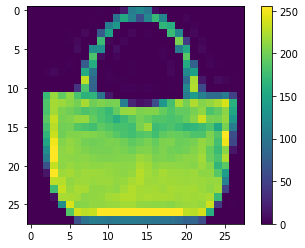

In [ ]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

Dimensione esses valores para um intervalo de 0 a 1 antes de alimentá-los para o modelo de rede neural. Para fazer isso, divida os valores por 255. É importante que o conjunto de treinamento e o conjunto de teste sejam pré-processados da mesma maneira:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar se os dados estão no formato correto e se você está pronto para construir e treinar a rede, vamos exibir as primeiras 25 imagens do conjunto de treinamento e exibir o nome da classe abaixo de cada imagem.

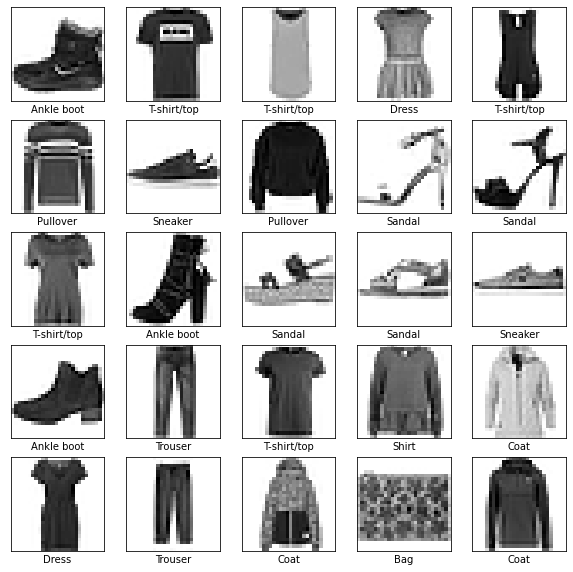

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir o modelo

A construção da rede neural requer a configuração das camadas do modelo e, a seguir, a compilação do modelo.

### Configure as camadas

O bloco de construção básico de uma rede neural é a * camada *. As camadas extraem representações dos dados alimentados nelas. Felizmente, essas representações são significativas para o problema em questão.

A maior parte do aprendizado profundo consiste em encadear camadas simples. A maioria das camadas, como `tf.keras.layers.Dense`, tem parâmetros que são aprendidos durante o treinamento.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

A primeira camada nesta rede, tf.keras.layers.Flatten, transforma o formato das imagens de uma matriz bidimensional (de 28 por 28 pixels) em uma matriz unidimensional (de 28 * 28 = 784 pixels). Pense nesta camada como desempilhar linhas de pixels na imagem e alinhá-los. Esta camada não tem parâmetros para aprender; ele apenas reformata os dados.

Depois que os pixels são achatados, a rede consiste em uma sequência de duas camadas tf.keras.layers.Dense. Essas são camadas neurais densamente conectadas ou totalmente conectadas. A primeira camada Densa tem 128 nós (ou neurônios). A segunda (e última) camada retorna uma matriz logits com comprimento de 10. Cada nó contém uma pontuação que indica que a imagem atual pertence a uma das 10 classes.

Compile o modelo
Antes que o modelo esteja pronto para o treinamento, ele precisa de mais algumas configurações. Eles são adicionados durante a etapa de compilação do modelo:

Função de perda - mede a precisão do modelo durante o treinamento. Você deseja minimizar esta função para "orientar" o modelo na direção certa.
Otimizador - É assim que o modelo é atualizado com base nos dados que vê e em sua função de perda.
Métricas - Usadas para monitorar as etapas de treinamento e teste. O exemplo a seguir usa precisão, a fração das imagens que são classificadas corretamente.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Treine o modelo

O treinamento do modelo de rede neural requer as seguintes etapas:

1. Alimente o modelo com os dados de treinamento. Neste exemplo, os dados de treinamento estão nos arrays `train_images` e` train_labels`.
2. O modelo aprende a associar imagens e rótulos.
3. Você pede ao modelo para fazer previsões sobre um conjunto de teste - neste exemplo, o array `test_images`.
4. Verifique se as previsões correspondem aos rótulos da matriz `test_labels`.


### Alimente o modelo
Para iniciar o treinamento, chame o método model.fit, assim chamado porque "ajusta" o modelo aos dados de treinamento:

In [ ]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4258 - accuracy: 0.8512
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4195 - accuracy: 0.8534
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4138 - accuracy: 0.8557
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4091 - accuracy: 0.8562
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4040 - accuracy: 0.8592
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3995 - accuracy: 0.8601
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3959 - accuracy: 0.8609
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3916 - accuracy: 0.8637
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3884 - accuracy: 0.8627
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.384

Conforme o modelo treina, as métricas de perda e precisão são exibidas. Este modelo atinge uma precisão de cerca de 0,91 (ou 91%) nos dados de treinamento.

### Avalie a precisão

Em seguida, compare o desempenho do modelo no conjunto de dados de teste:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4108 - accuracy: 0.8537

Test accuracy: 0.8536999821662903


Acontece que a precisão no conjunto de dados de teste é um pouco menor do que a precisão no conjunto de dados de treinamento. Esta lacuna entre a precisão do treinamento e a precisão do teste representa * sobreajuste *. O sobreajuste acontece quando um modelo de aprendizado de máquina tem desempenho pior em entradas novas e não vistas do que nos dados de treinamento. Um modelo superaquecido "memoriza" o ruído e os detalhes no conjunto de dados de treinamento até um ponto em que afeta negativamente o desempenho do modelo nos novos dados. Para obter mais informações, consulte o seguinte:
* [Demonstrar overfitting] (https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
* [Estratégias para evitar overfitting] (https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Fazer previsões

Com o modelo treinado, você pode usá-lo para fazer previsões sobre algumas imagens.
As saídas lineares do modelo, [logits] (https://developers.google.com/machine-learning/glossary#logits). Anexe uma camada softmax para converter os logits em probabilidades, que são mais fáceis de interpretar.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Aqui, o modelo previu o rótulo de cada imagem no conjunto de teste. Vamos dar uma olhada na primeira previsão:

In [ ]:
predictions[0]

array([2.0867689e-07, 7.7408302e-09, 2.5315285e-06, 2.8312702e-06,
       8.6412174e-06, 1.0192273e-01, 7.2502012e-06, 8.0197491e-02,
       3.3671826e-03, 8.1449115e-01], dtype=float32)

Uma previsão é uma matriz de 10 números. Eles representam a "confiança" da modelo de que a imagem corresponde a cada uma das 10 diferentes peças de roupa. Você pode ver qual rótulo tem o maior valor de confiança:

In [ ]:
np.argmax(predictions[0])

9

Portanto, o modelo está mais confiante de que esta imagem é uma bota de tornozelo, ou `class_names [9]`. O exame do rótulo do teste mostra que esta classificação está correta:

In [ ]:
test_labels[0]

9

Faça um gráfico para ver o conjunto completo de 10 previsões de classe.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verifique as previsões

Com o modelo treinado, você pode usá-lo para fazer previsões sobre algumas imagens.

Vejamos a 0ª imagem, previsões e array de previsões. Os rótulos de predição corretos são azuis e os rótulos de predição incorretos são vermelhos. O número fornece a porcentagem (de 100) para o rótulo previsto.

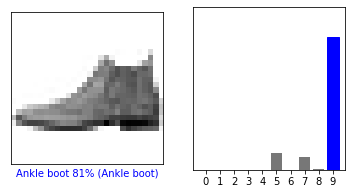

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

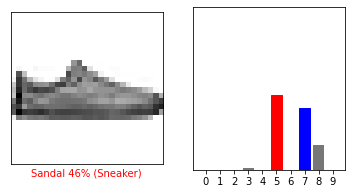

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos plotar várias imagens com suas previsões. Observe que o modelo pode estar errado mesmo quando muito confiante.

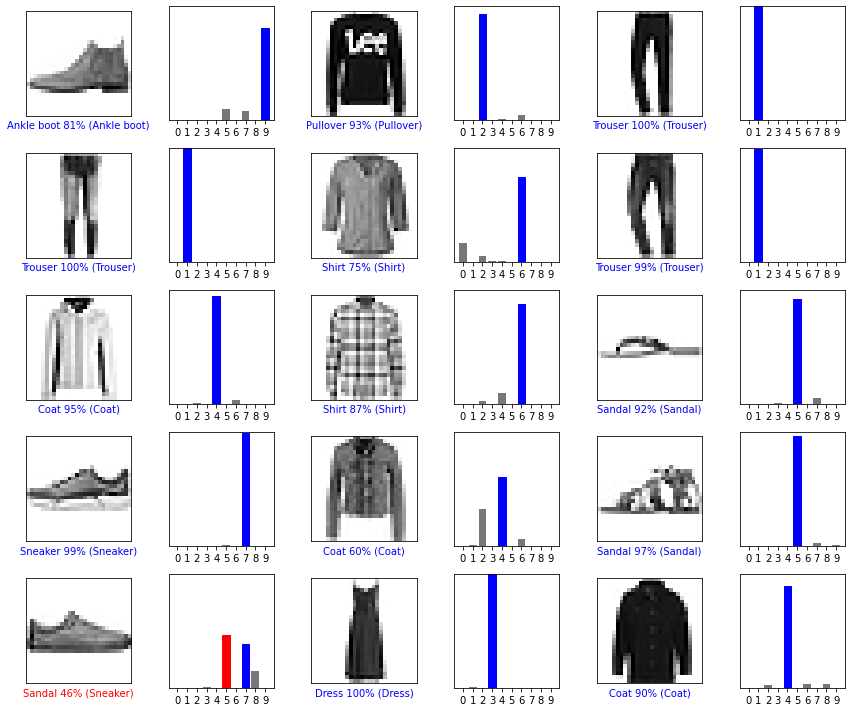

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use o modelo treinado

Por fim, use o modelo treinado para fazer uma previsão sobre uma única imagem.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Os modelos `tf.keras` são otimizados para fazer previsões em um * lote *, ou coleção, de exemplos de uma vez. Da mesma forma, mesmo que você esteja usando uma única imagem, você precisa adicioná-la a uma lista:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


Agora preveja o rótulo correto para esta imagem:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.8882358e-04 3.1167349e-06 9.3151206e-01 4.9778191e-05 1.6755693e-02
  6.0231000e-12 5.0991476e-02 5.6923375e-21 9.9028141e-05 1.1730677e-14]]


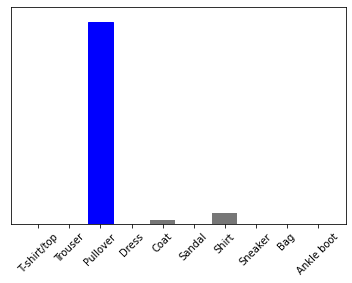

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`tf.keras.Model.predict` retorna uma lista de listas - uma lista para cada imagem no lote de dados. Pegue as previsões para nossa (única) imagem no lote:

In [ ]:
np.argmax(predictions_single[0])

2

E o modelo prevê um rótulo conforme o esperado.